In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset and find shape.
df = pd.read_csv('/content/drive/MyDrive/Innomatics/Innomatics Hackathon/data.csv')
print(df.shape) # No. of rows and columns

(1111742, 30)


In [ ]:
# Load first five rows.
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,1437,0,0,0.000,1403,squad-fpp,31,29,-1,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,1225,0,0,0.000,1971,squad-fpp,30,30,-1,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,0,0,0,0.000,1741,solo-fpp,96,89,1516,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,1286,0,0,0.000,1738,squad-fpp,28,27,-1,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,0,1,1,7.737,2193,solo,99,95,1482,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

In [ ]:
# Checking for missing values
print(df.isnull().sum())

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64


In [ ]:
# Drop null values from winPlacePerc
df = df.dropna(axis=0, subset= ['winPlacePerc'])

In [ ]:
# Five Point summary
df.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06,1.111741e+06
mean,2.224361e+06,2.336740e-01,1.106656e+00,1.307365e+02,6.573617e-01,2.266490e-01,1.370349e+00,4.759566e+01,5.044306e+02,9.255105e-01,5.448508e-01,2.299816e+01,1.579349e+03,4.450588e+01,4.300696e+01,8.927896e+02,1.641785e-01,6.042148e+02,3.551187e-03,4.545073e+00,2.401099e-02,7.833659e-03,1.153283e+03,3.659688e+00,6.057071e+02,4.727868e-01
std,1.283879e+06,5.894031e-01,1.716051e+00,1.711756e+02,1.146023e+00,6.033359e-01,2.683820e+00,2.747022e+01,6.274007e+02,1.562216e+00,7.129033e-01,5.106979e+01,2.589306e+02,2.381986e+01,2.327839e+01,7.366444e+02,4.704190e-01,1.495950e+03,7.385455e-02,3.061858e+01,1.678910e-01,9.194626e-02,1.182788e+03,2.461803e+00,7.395141e+02,3.073771e-01
min,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.330000e+02,2.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.112440e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,2.223770e+06,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.444000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,3.337955e+06,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,1.000000e+00,2.133000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,7.940000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,4.446964e+06,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.040000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


Exploratory Data Analysis


In [ ]:
# Finding unique values in columns 'Id', 'groupId','matchId'.
for i in ['Id', 'groupId', 'matchId']:
  print(f'unique[{i}] count:', df[i].nunique())

unique[Id] count: 1111741
unique[groupId] count: 870621
unique[matchId] count: 47950


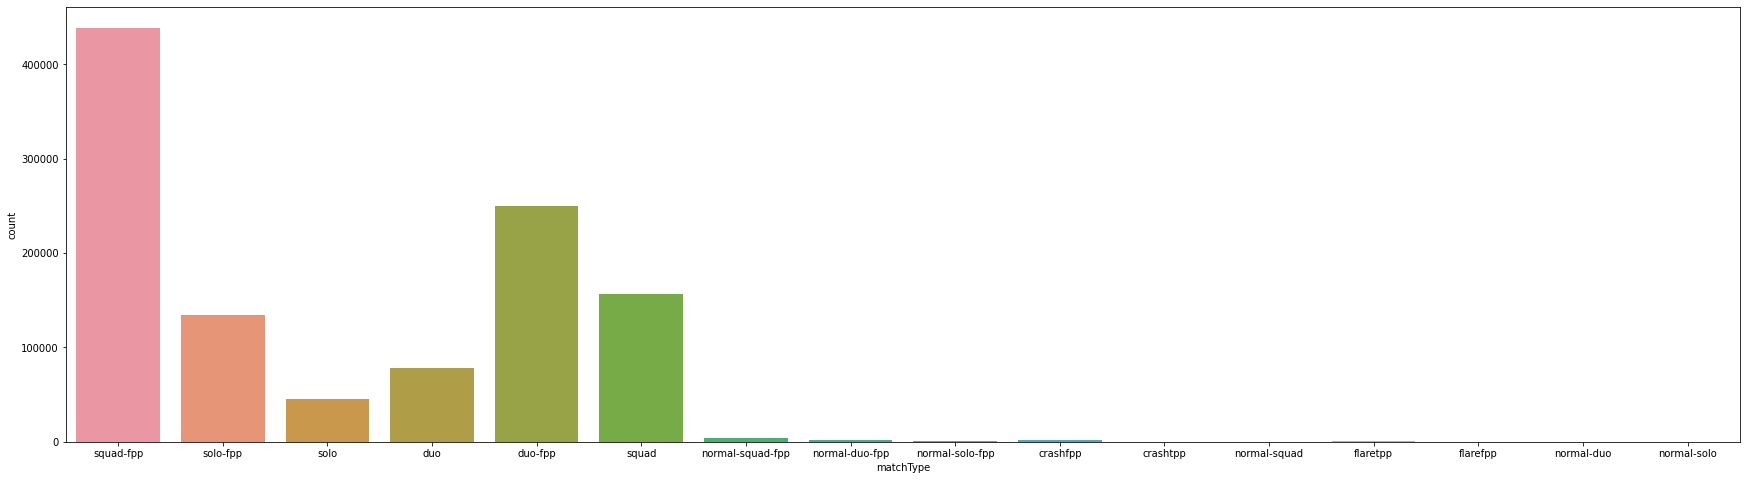

In [ ]:
# Univariate Analysis
plt.figure(figsize=(30,8))
ax = sns.countplot(df['matchType'])

We observe most of the players are from squad-fpp, duo-fpp, squad, solo-fpp,duo and solo. Remaining all are from custom matches.

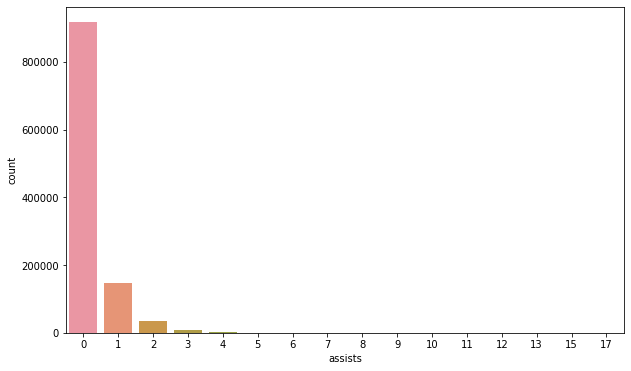

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(df['assists'])

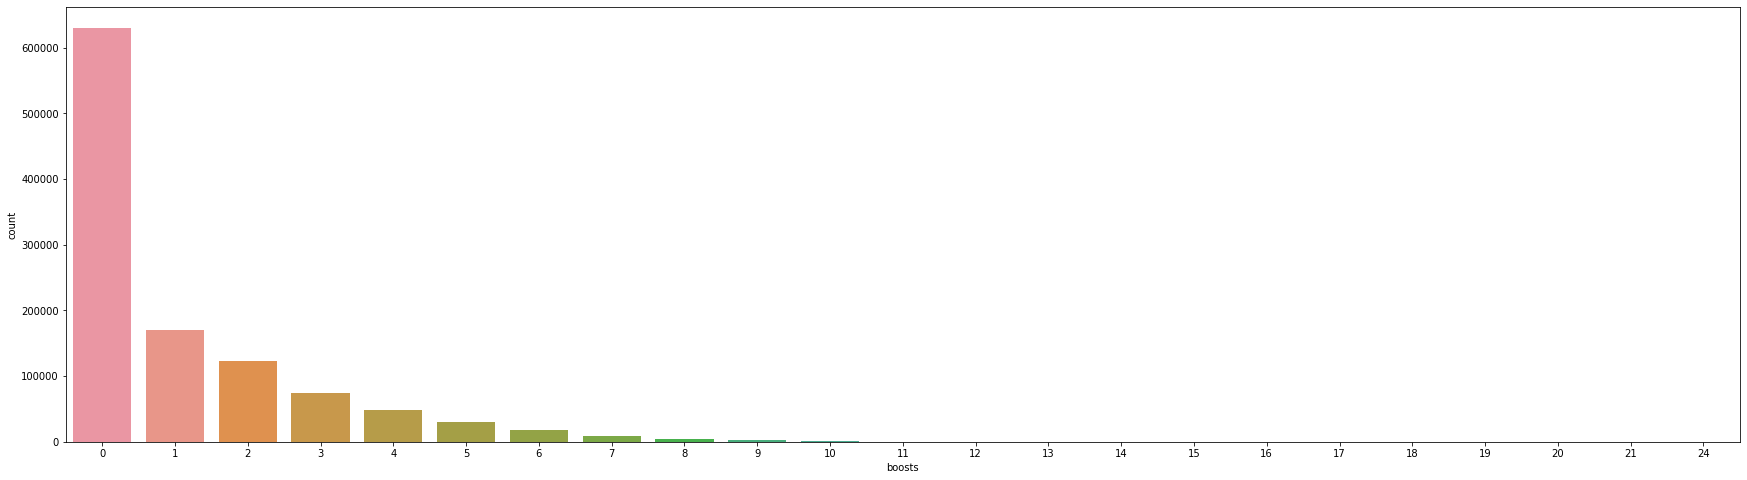

In [ ]:
plt.figure(figsize=(30,8))
ax = sns.countplot(df['boosts'])

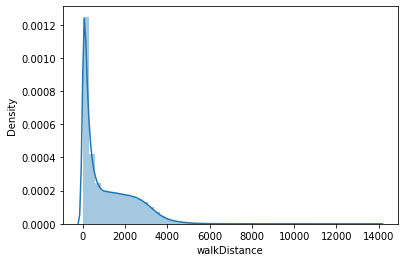

In [ ]:
sns.distplot(df['walkDistance'])

We observe most of the players walked a distance of 0 to 4000 meters.

TypeError: ignored

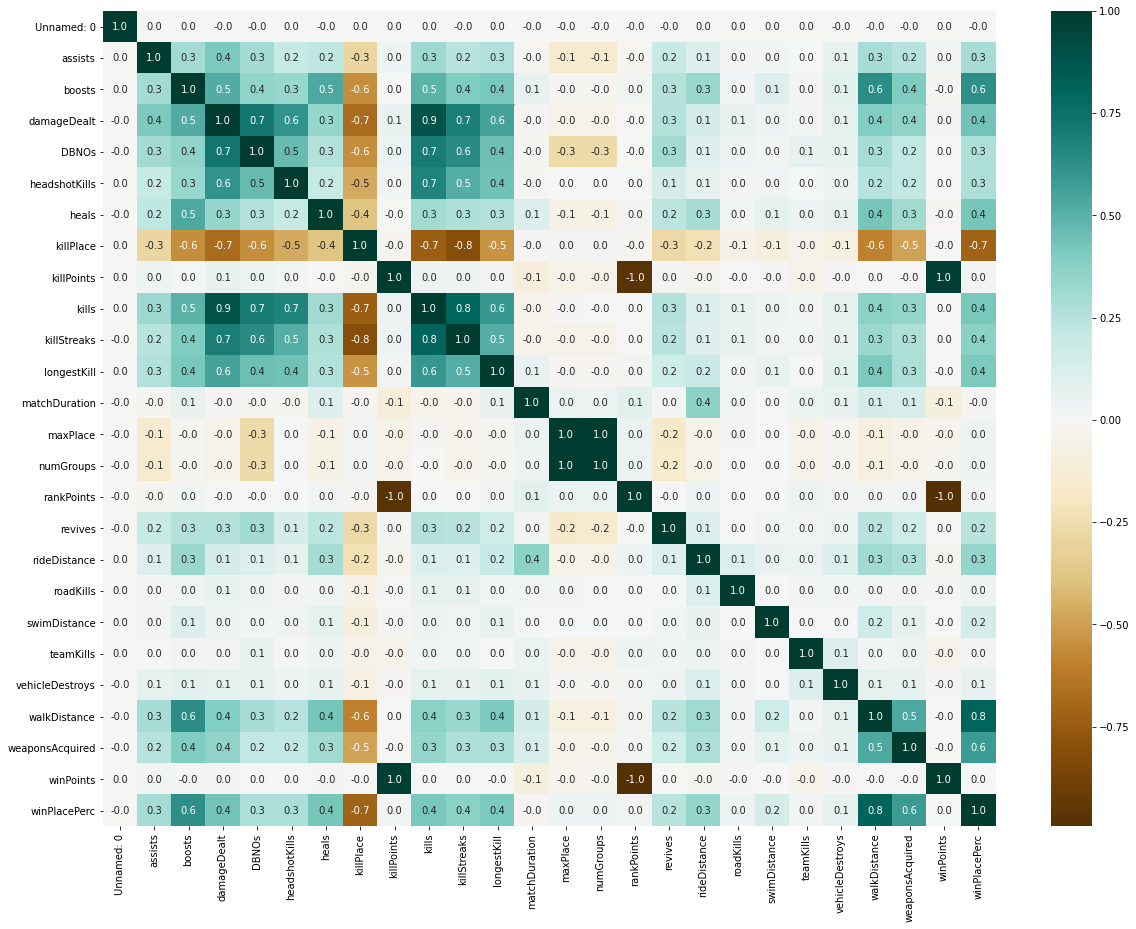

In [ ]:
# Correlation matrix with heatmap. 
corr= df.corr()
f,ax = plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt= '.1f', ax=ax, cmap= 'BrBG')
sns.set(font_scale=1.25)
plt.show()


# Insights:
 - WinPlacePercentage and walkDistance are extremely positive correlated.
 - WinPlacePercentage and boosts, weaponsAcquired are highly positive correlated.
 - WinPlacePercentage and assists, damageDealt, DBNOs, headshotKills, heals,kills, longestKill, rideDistance are moderately postive correlated.
 - WinPlacePercentage and killPlace are extremely negative correlated.

In [ ]:
df.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [ ]:
# Dropping columns that are not correlated to WinPlacePerc.
df1 = df.drop(['Unnamed: 0', 'killPoints', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'roadKills', 'teamKills','vehicleDestroys'], axis=1)

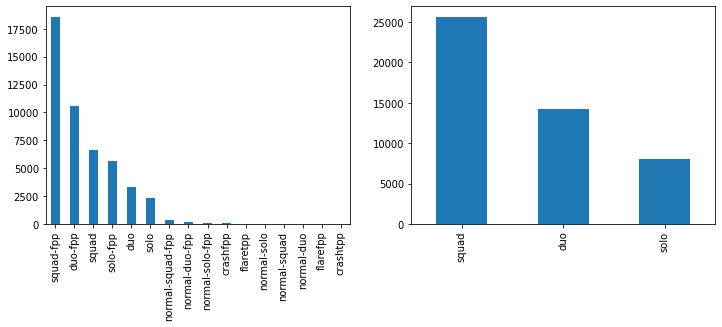

In [ ]:
# Bivariate Analysis
fig, ax = plt.subplots(1,2, figsize= (12,4))
df1.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[0])
mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
df1['matchType'] = df1['matchType'].apply(mapper)
df1.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[1])

By using groupby function, converted the matchtype variables to 3 types i.e, squad(more than equal to 4 players), duo(2 players), solo(1 player). We observe squad is having highest count and solo is having least count.

In [ ]:
# Weapons Acquired
df1[df1['weaponsAcquired'] > 5]['weaponsAcquired'].value_counts().sort_index()

6      91783
7      56355
8      32307
9      17171
10      8959
       ...  
88         1
95         1
96         1
128        1
177        1
Name: weaponsAcquired, Length: 69, dtype: int64

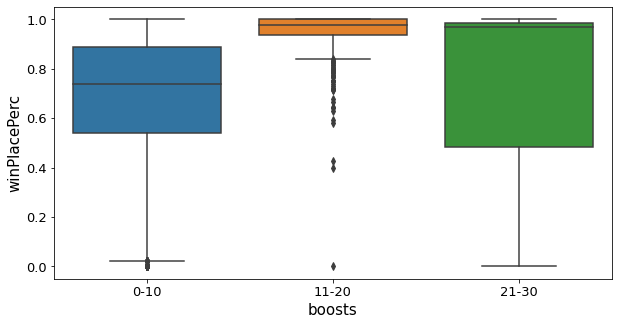

In [ ]:
# Boxplot for columns winPlacePerc and boosts
df1['boosts'] = pd.cut(df1['boosts'], [0, 10, 20, 30], labels=['0-10', '11-20', '21-30'])
f,ax=plt.subplots(figsize=(10,5))
sns.boxplot(x="boosts", y="winPlacePerc", data=df1)
ax.set_xlabel('boosts',fontsize=15)
ax.tick_params(axis='x',labelsize=13)
ax.set_ylabel('winPlacePerc',fontsize=15)
ax.tick_params(axis='y',labelsize=13)
f.show()

We observe outliers in the boosts column.

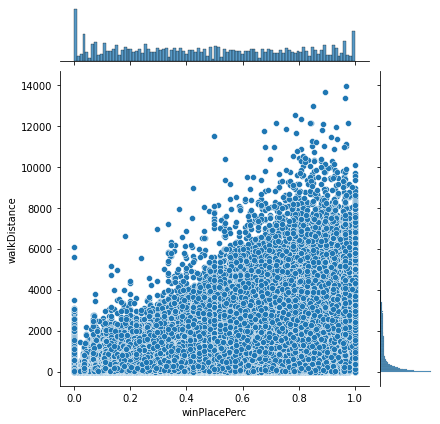

In [ ]:
sns.jointplot(df1['winPlacePerc'], df1['walkDistance'])

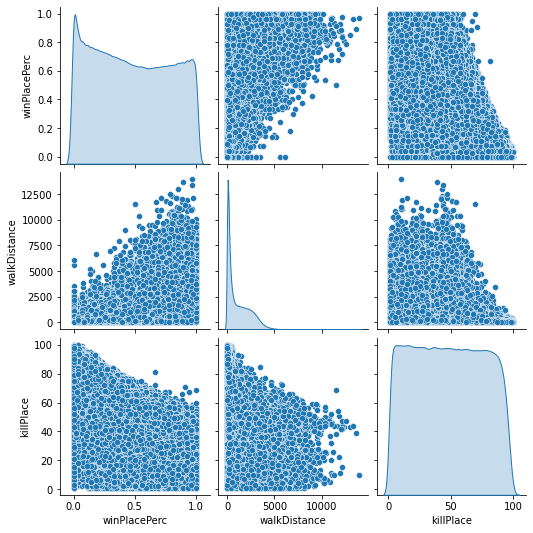

In [ ]:
sns.pairplot(df1[['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired', 'killPlace']], diag_kind='kde')

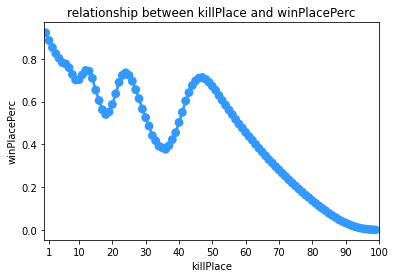

In [40]:
sns.pointplot(x='killPlace',y='winPlacePerc',data=df1,color='#3399FF',alpha=0.8 )
plt.title('relationship between killPlace and winPlacePerc')
ax = plt.axes() 
ax.set_xticks([1, 10, 20, 30, 40,50,60,70,80,90,100])
ax.set_xticklabels(['1', '10', '20', '30', '40','50', '60', '70', '80', '90','100'])
plt.show()

ValueError: ignored

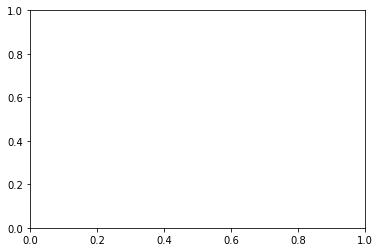